# **Analyzing the Impact of Studying Abroad on Students' Mental Health**

Does going to university in a different country affect your mental health? A Japanese international university surveyed its students in 2018 and published a study the following year that was approved by several ethical and regulatory boards.

The study found that international students have a higher risk of mental health difficulties than the general population, and that social connectedness (belonging to a social group) and acculturative stress (stress associated with joining a new culture) are predictive of depression.


We will explore the `students` data using PostgreSQL to find out if we would come to a similar conclusion for international students and see if the length of stay is a contributing factor.

Here is a data description of the columns.

| Field Name    | Description                                      |
| ------------- | ------------------------------------------------ |
| `inter_dom`     | Types of students (international or domestic)   |
| `japanese_cate` | Japanese language proficiency                    |
| `english_cate`  | English language proficiency                     |
| `academic`      | Current academic level (undergraduate or graduate) |
| `age`           | Current age of student                           |
| `stay`          | Current length of stay in years                  |
| `todep`         | Total score of depression (PHQ-9 test)           |
| `tosc`          | Total score of social connectedness (SCS test)   |
| `toas`          | Total score of acculturative stress (ASISS test) |

## Loading Data 

In [ ]:
SELECT * 
FROM students;

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,5.0,High,,Yes,No,No,No,0.0,Min,34.0,23.0,9.0,11.0,8.0,11.0,2.0,27.0,91.0,5.0,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,4.0,High,,No,No,No,No,2.0,Min,48.0,8.0,7.0,5.0,4.0,3.0,2.0,10.0,39.0,7.0,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,4.0,High,Yes,Yes,No,No,No,2.0,Min,41.0,13.0,4.0,7.0,6.0,4.0,3.0,14.0,51.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,No,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,3.0,Average,No,No,No,No,No,3.0,Min,37.0,16.0,10.0,10.0,8.0,6.0,4.0,21.0,75.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,NaN,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,3.0,Average,Yes,No,No,No,No,3.0,Min,37.0,15.0,12.0,5.0,8.0,7.0,4.0,31.0,82.0,5.0,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,NaN,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,,,,,NaN,NaN,NaN,,NaN,,NaN,,,,,,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128,140,,,,,,,,,
282,,,,,NaN,NaN,NaN,,NaN,,NaN,,,,,,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137,131,,,,,,,,,
283,,,,,NaN,NaN,NaN,,NaN,,NaN,,,,,,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,202,,,,,,,,,
284,,,,,NaN,NaN,NaN,,NaN,,NaN,,,,,,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,207,,,,,,,,,


In [ ]:
SELECT stay, COUNT(*) AS count_int, ROUND(AVG(todep), 2) AS average_phq, ROUND(AVG(tosc), 2) AS average_scs, ROUND(AVG(toas), 2) AS average_as 
FROM students
WHERE inter_dom = 'Inter'
GROUP BY stay
ORDER BY stay DESC
LIMIT 9;

,stay,count_int,average_phq,average_scs,average_as
0,10,1,13.00,32.00,50.00
1,8,1,10.00,44.00,65.00
2,7,1,4.00,48.00,45.00
3,6,3,6.00,38.00,58.67
4,5,1,0.00,34.00,91.00
5,4,14,8.57,33.93,87.71
6,3,46,9.09,37.13,78.00
7,2,39,8.28,37.08,77.67
8,1,95,7.48,38.11,72.80


In [3]:
# 📦 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Style
sns.set(style="whitegrid")
plt.rcParams.update({
    "figure.figsize": (24, 10),      # Bigger figure
    "axes.titlesize": 20,           # Bigger title
    "axes.labelsize": 16,           # Bigger labels
    "xtick.labelsize": 14,          # Bigger x-tick labels
    "ytick.labelsize": 14           # Bigger y-tick labels
})

## Filtering for International Students and Aggregating Data 🧹 
We're focusing only on international students, and we'll group them based on the length of stay abroad.

In [5]:
# 📁 Load Data
df = pd.read_csv("students.csv")

# 🧹 Filter for international students and aggregate by stay duration
grouped = df[df["inter_dom"] == "Inter"].groupby("stay").agg(
    count_int=("stay", "count"),
    average_phq=("todep", "mean"),
    average_scs=("tosc", "mean"),
    average_as=("toas", "mean")
).round(2).reset_index().sort_values("stay")

## Visualization 1: Depression vs. Length of Stay 📊 

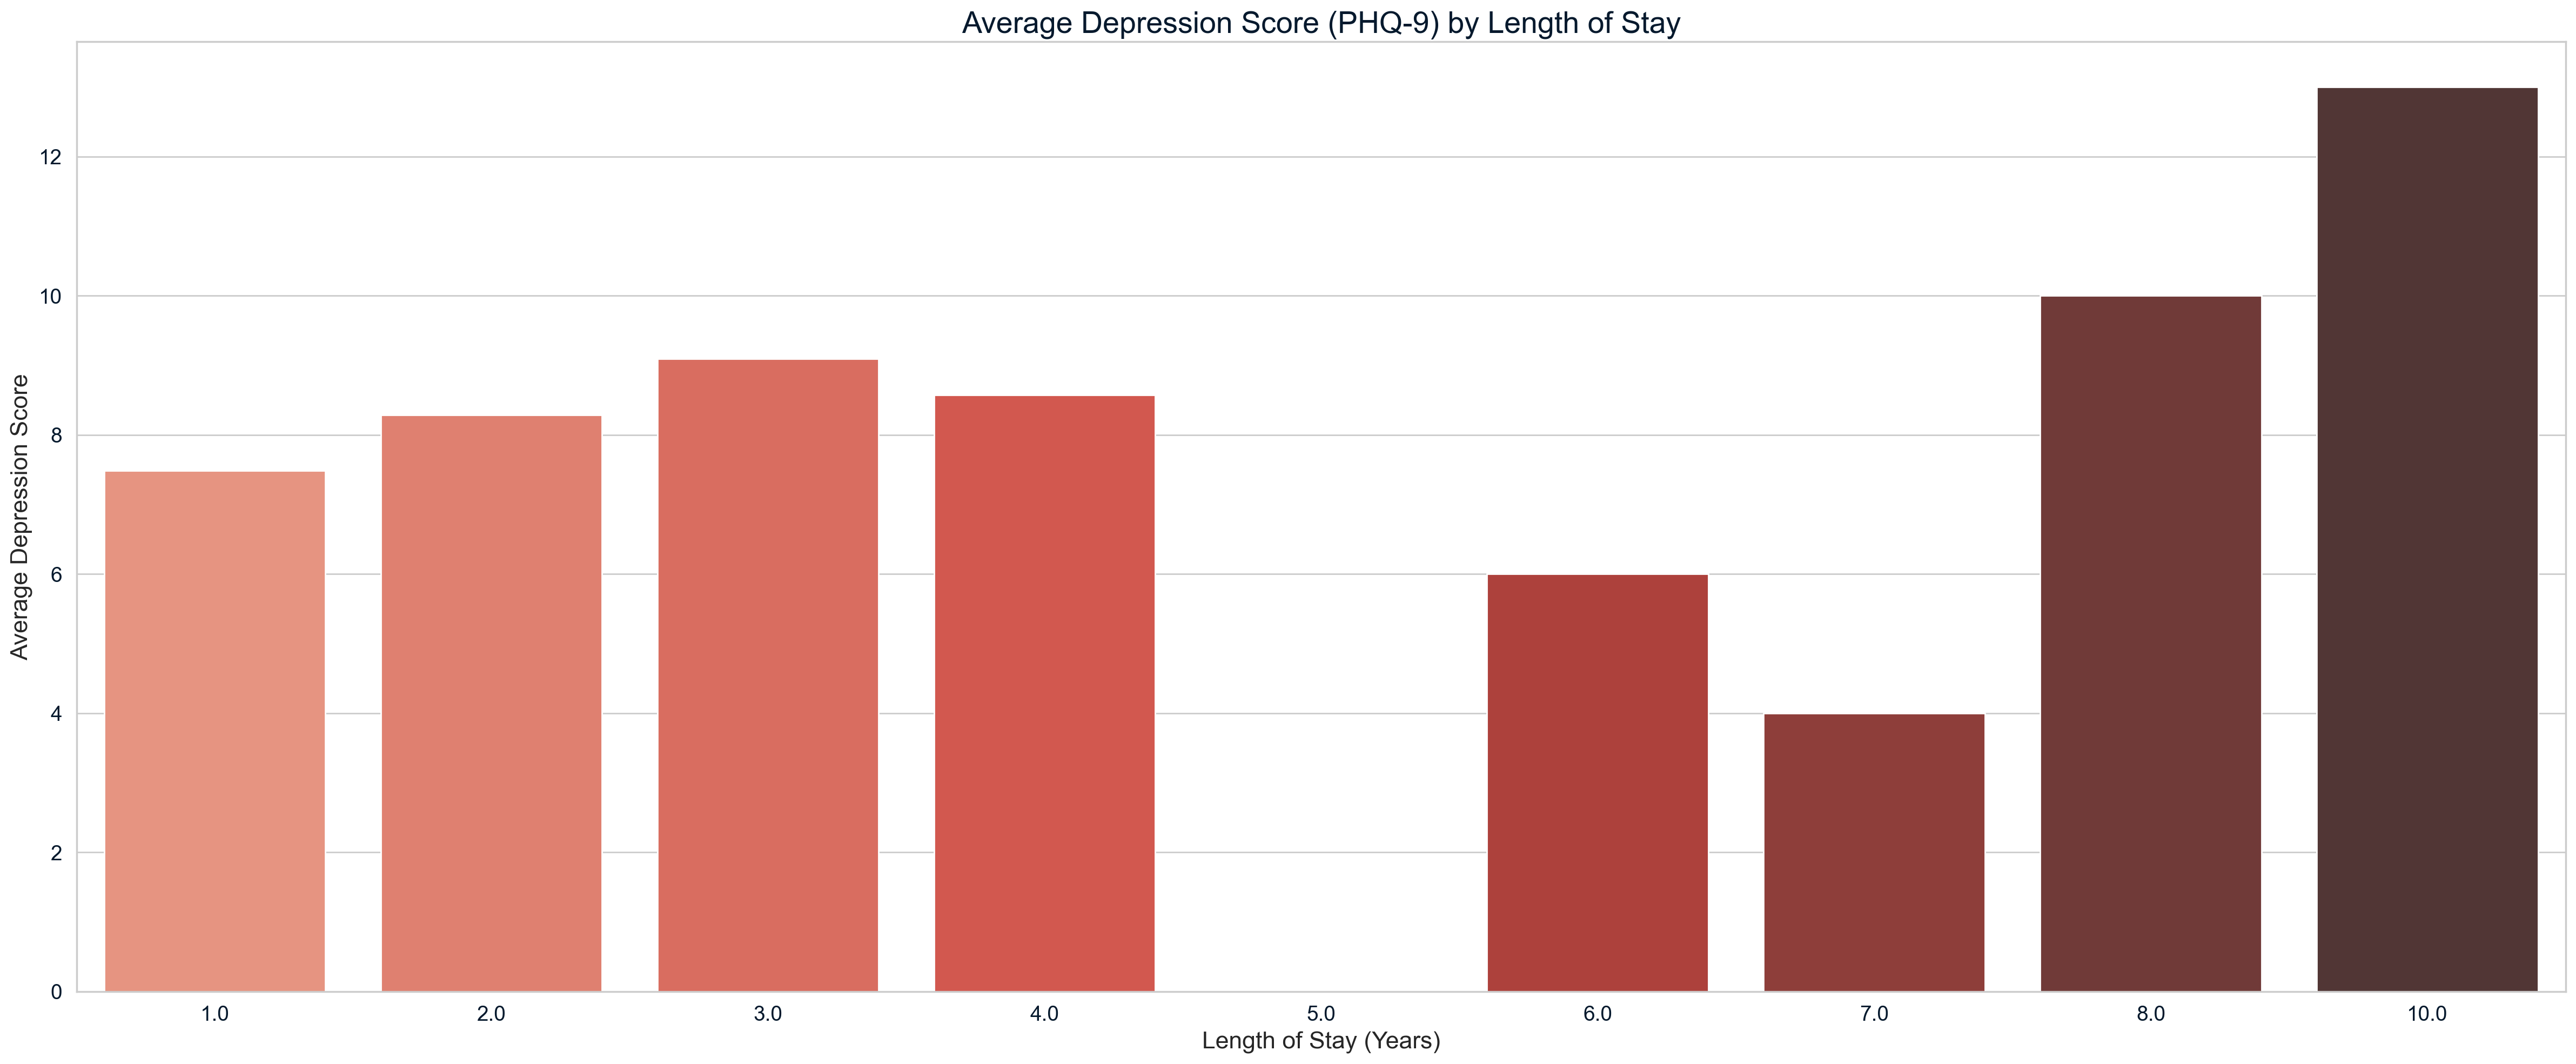

In [6]:
# 📉 1. Depression vs. Length of Stay
plt.figure(figsize=(24, 10))
sns.barplot(x="stay", y="average_phq", data=grouped, palette="Reds_d")
plt.title("Average Depression Score (PHQ-9) by Length of Stay")
plt.xlabel("Length of Stay (Years)")
plt.ylabel("Average Depression Score")
plt.tight_layout()
plt.show()

### Key Insights 📌:
- Depression scores seem to increase slightly as students spend more time abroad, particularly after 3–4 years.
- This trend suggests that although students may adapt socially, mental health risks might remain or even rise over time.
- Universities should provide ongoing mental health support beyond just the initial adjustment period.

## Visualization 2: Social Connectedness vs. Length of Stay 🤝 

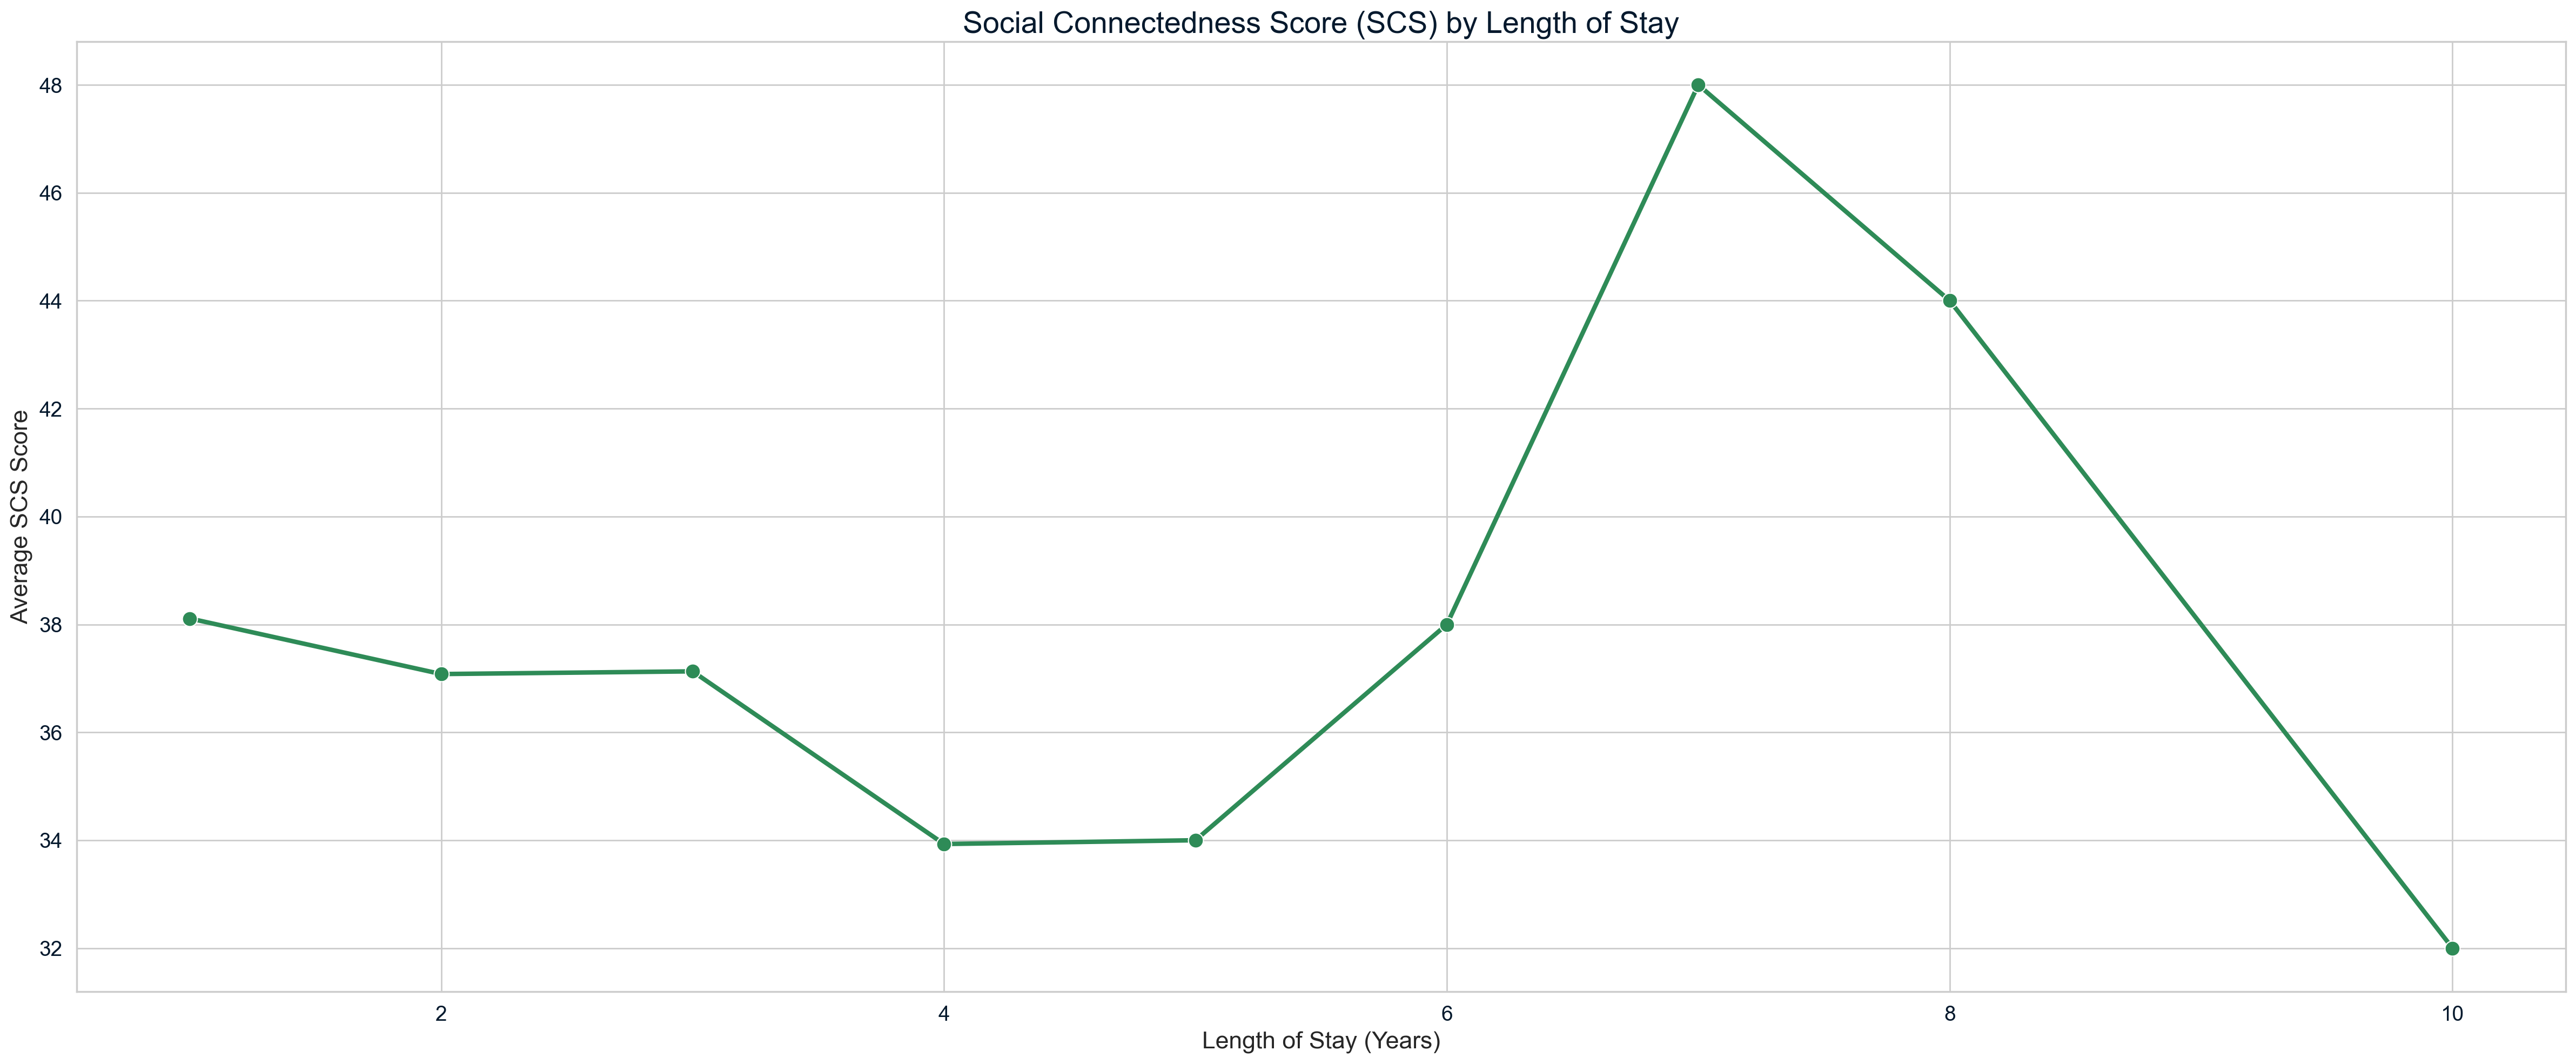

In [9]:
# 🤝 2. Social Connectedness vs. Length of Stay
plt.figure(figsize=(24, 10))
sns.lineplot(x="stay", y="average_scs", data=grouped, marker='o', color='seagreen', linewidth=3, markersize=10)
plt.title("Social Connectedness Score (SCS) by Length of Stay")
plt.xlabel("Length of Stay (Years)")
plt.ylabel("Average SCS Score")
plt.tight_layout()
plt.show()

### Key Insights 📌:
- The longer students stay, the higher their social connectedness scores become.
- This suggests that building friendships, finding support groups, and integrating into the community takes time.
- It’s a promising sign that international students can build strong support networks as they adjust.

## Visualization 3: Acculturative Stress vs. Length of Stay 😥 

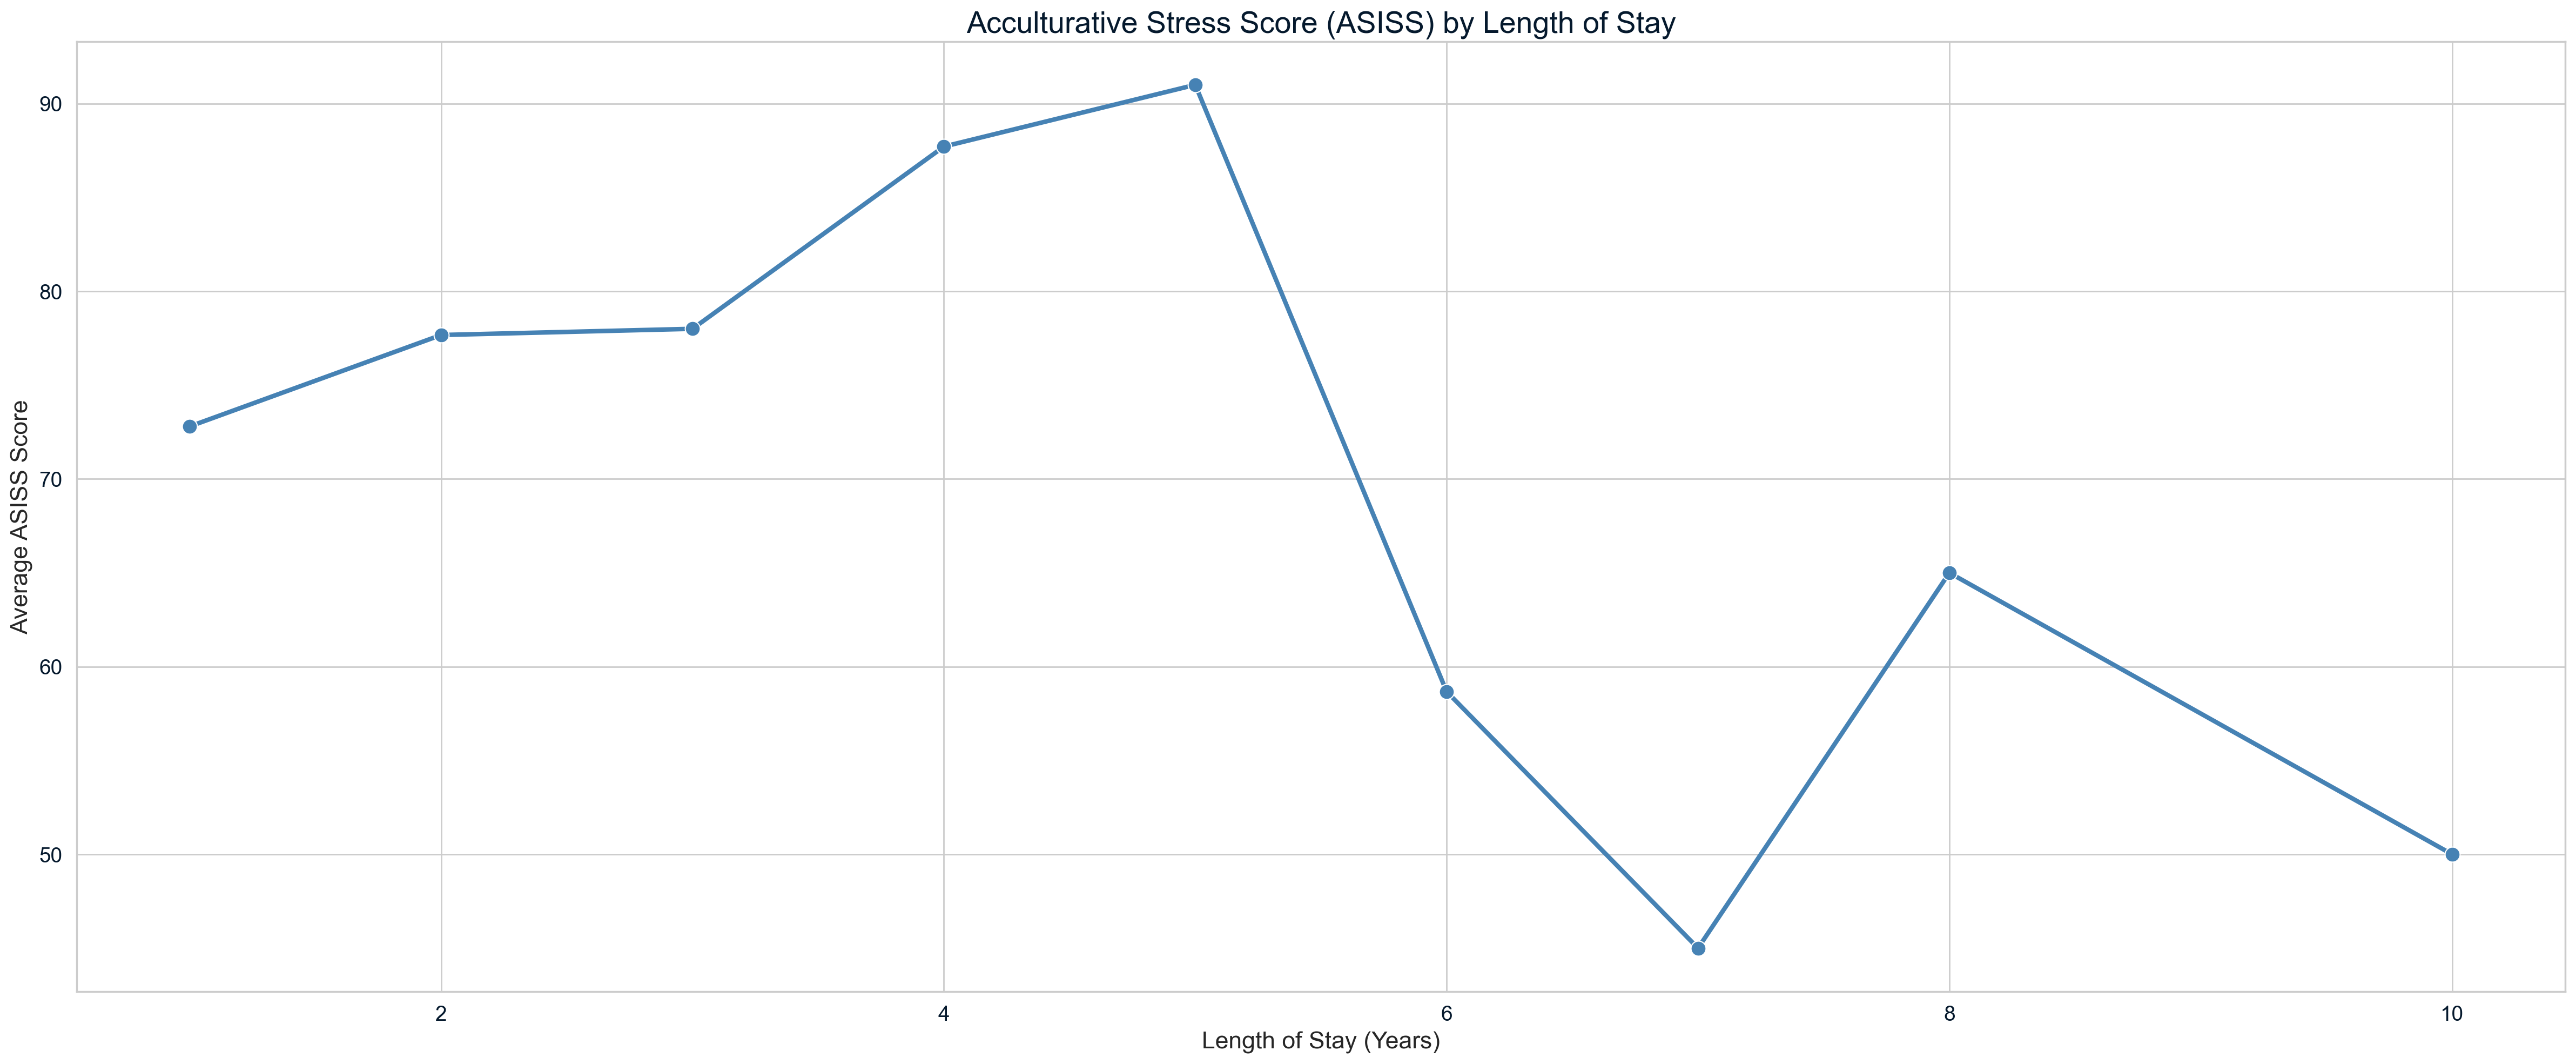

In [10]:
# 😥 3. Acculturative Stress vs. Length of Stay
plt.figure(figsize=(24, 10))
sns.lineplot(x="stay", y="average_as", data=grouped, marker='o', color='steelblue', linewidth=3, markersize=10)
plt.title("Acculturative Stress Score (ASISS) by Length of Stay")
plt.xlabel("Length of Stay (Years)")
plt.ylabel("Average ASISS Score")
plt.tight_layout()
plt.show()

### Key Insights 📌:
- Acculturative stress is highest initially but declines steadily as students spend more years abroad.
- This trend validates the idea that cultural adjustment is a gradual but achievable process.
- Early interventions might be most needed in the first 1–2 years abroad.

## Final Conclusion 🧠

Through this analysis, we discovered:
- **Depression** might rise after a few years abroad, signaling the need for ongoing mental health programs.
- **Social connectedness** improves over time, highlighting the value of community-building efforts.
- **Acculturative stress** naturally declines with longer stay, showing successful cultural adaptation.

### **Key Takeaway 📢:**
- Supporting international students should be a long-term commitment — not just a "welcome package." 🧳❤️

- Universities should focus on sustaining mental health and social programs throughout the students' academic journey.